In [41]:
import pandas as pd

# Load datasets
games_df = pd.read_csv("C:/Users/purni/Desktop/videogames_project/games.csv")
sales_df = pd.read_csv("C:/Users/purni/Desktop/videogames_project/vgsales.csv")

# Display basic info
print("Games Dataset:")
print(games_df.info(), "\n")

print("Sales Dataset:")
print(sales_df.info())


Games Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB
None 

Sales Dataset:
<class 'pandas.core.fra

In [43]:
import numpy as np

def convert_to_number(x):
    if isinstance(x, str):
        x = x.replace(',', '').strip()
        if x.endswith('K'):
            return float(x[:-1]) * 1000
        elif x.endswith('M'):
            return float(x[:-1]) * 1000000
        else:
            try:
                return float(x)
            except:
                return np.nan
    return x

# Columns to clean
numeric_cols = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']

# Apply conversion
for col in numeric_cols:
    games_df[col] = games_df[col].apply(convert_to_number)


In [45]:
print(games_df[numeric_cols].head())
print(games_df[numeric_cols].dtypes)


   Times Listed  Number of Reviews    Plays  Playing  Backlogs  Wishlist
0        3900.0             3900.0  17000.0   3800.0    4600.0    4800.0
1        2900.0             2900.0  21000.0   3200.0    6300.0    3600.0
2        4300.0             4300.0  30000.0   2500.0    5000.0    2600.0
3        3500.0             3500.0  28000.0    679.0    4900.0    1800.0
4        3000.0             3000.0  21000.0   2400.0    8300.0    2300.0
Times Listed         float64
Number of Reviews    float64
Plays                float64
Playing              float64
Backlogs             float64
Wishlist             float64
dtype: object


In [47]:
# Convert Release Date to datetime, coerce errors
games_df['Release Date'] = pd.to_datetime(games_df['Release Date'], errors='coerce')

# Extract release year
games_df['Release Year'] = games_df['Release Date'].dt.year


In [49]:
print(games_df[['Title', 'Release Date', 'Release Year']].head())
print(games_df['Release Year'].value_counts().sort_index())


                                     Title Release Date  Release Year
0                               Elden Ring   2022-02-25        2022.0
1                                    Hades   2019-12-10        2019.0
2  The Legend of Zelda: Breath of the Wild   2017-03-03        2017.0
3                                Undertale   2015-09-15        2015.0
4                            Hollow Knight   2017-02-24        2017.0
Release Year
1980.0      1
1982.0      1
1985.0      1
1986.0      4
1987.0      3
1988.0      5
1989.0      5
1990.0      6
1991.0     11
1992.0      6
1993.0     12
1994.0     11
1995.0     12
1996.0     15
1997.0     18
1998.0     16
1999.0     25
2000.0     15
2001.0     30
2002.0     22
2003.0     26
2004.0     37
2005.0     41
2006.0     32
2007.0     50
2008.0     44
2009.0     40
2010.0     58
2011.0     50
2012.0     60
2013.0     68
2014.0     59
2015.0     73
2016.0     75
2017.0     70
2018.0     77
2019.0     87
2020.0     74
2021.0     97
2022.0    132
2023.0 

In [51]:
print(games_df.isnull().sum())


Unnamed: 0            0
Title                 0
Release Date          3
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
Release Year          3
dtype: int64


In [53]:
games_df.dropna(inplace=True)
games_df.reset_index(drop=True, inplace=True)


In [55]:
# Drop rows with missing Release Date (and hence Release Year)
games_df = games_df.dropna(subset=['Release Date'])

# Fill missing 'Team' and 'Summary' with placeholder
games_df['Team'] = games_df['Team'].fillna('Unknown')
games_df['Summary'] = games_df['Summary'].fillna('No summary available')

# Fill missing Rating with mean (or median)
games_df['Rating'] = games_df['Rating'].fillna(games_df['Rating'].mean())

# Recalculate 'Release Year' from cleaned 'Release Date'
games_df['Release Year'] = pd.to_datetime(games_df['Release Date'], errors='coerce').dt.year


In [57]:
games_df.isna().sum()


Unnamed: 0           0
Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
Release Year         0
dtype: int64

In [59]:
games_df.drop_duplicates(inplace=True)


In [61]:
games_df['Team'] = games_df['Team'].str.strip().str.title()
games_df['Genres'] = games_df['Genres'].str.lower().str.strip()

In [63]:
from sqlalchemy import create_engine

# Replace with your actual credentials
db_name = 'videogames_db'
db_user = 'postgres'
db_password = 'PASSsql'
db_host = 'localhost'
db_port = '5432'

engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')


In [64]:
games_metadata_df = games_df.copy()
games_metadata_df['release_year'] = games_metadata_df['Release Date'].dt.year


In [67]:
games_df.to_sql('games', engine, if_exists='replace', index=False)
sales_df.to_sql('vgsales', engine, if_exists='replace', index=False)
games_metadata_df.to_sql('games_metadata', engine, if_exists='replace', index=False)


496

In [68]:
pd.read_sql("SELECT COUNT(*) FROM games_metadata", engine)


,count
0,1496


In [69]:
# Normalize text in categorical columns
for col in ['Genres', 'Team']:
    games_df[col] = games_df[col].str.lower().str.strip()

# Split multi-genre when comma-separated and explode as separate rows
games_df = games_df.assign(Genre=games_df['Genres'].str.split(',')).explode('Genre')
games_df['Genre'] = games_df['Genre'].str.strip()


In [70]:
import numpy as np

# Compute z‑scores for Plays column
plays_mean = games_df['Plays'].mean()
plays_std = games_df['Plays'].std()
games_df['z_play'] = ((games_df['Plays'] - plays_mean) / plays_std).abs()

# Keep only values with |z| ≤ 3
games_df = games_df[games_df['z_play'] <= 3].drop(columns=['z_play'])


In [71]:
# Normalize platform and publisher text values
for col in ['Platform', 'Publisher']:
    sales_df[col] = sales_df[col].str.lower().str.strip()


In [72]:
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
    sales_df[col] = (sales_df[col] + 0.001) ** 0.5


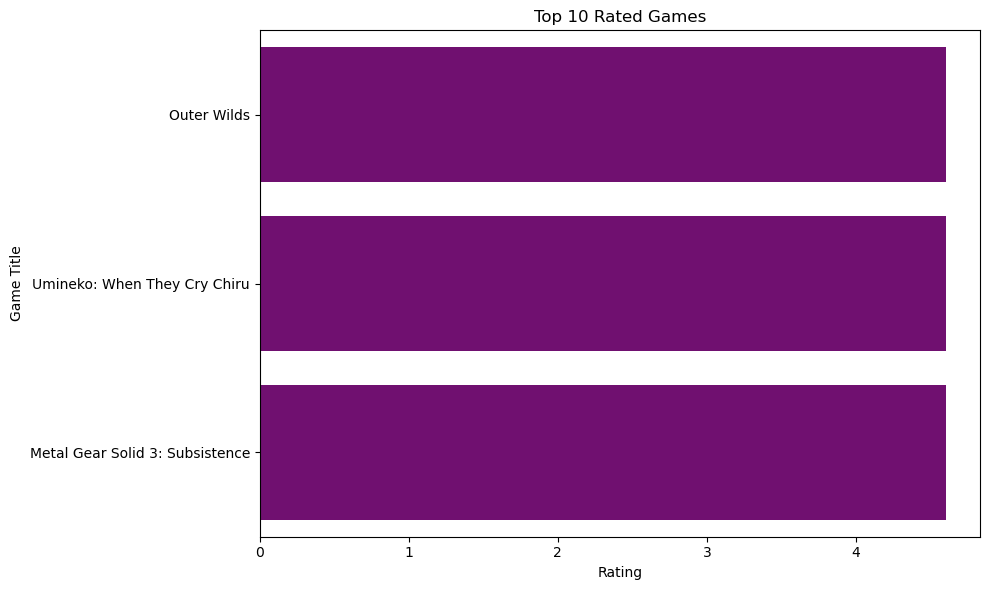

In [73]:
top_rated_games = games_df[['Title', 'Rating']].sort_values(by='Rating', ascending=False).head(10)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_rated_games, x='Rating', y='Title', color='purple')
plt.title('Top 10 Rated Games')
plt.xlabel('Rating')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()


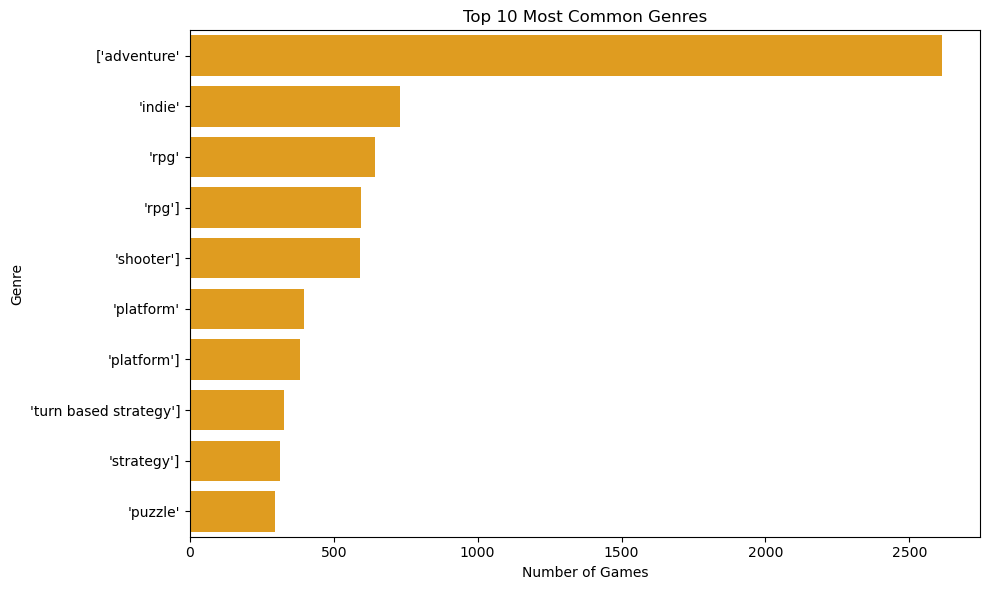

In [80]:
from collections import Counter

# Some games have multiple genres separated by commas
genre_series = games_df['Genres'].dropna().str.split(', ')
genre_list = [genre for sublist in genre_series for genre in sublist]
genre_counts = Counter(genre_list)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=genre_df.head(10), x='Count', y='Genre', color='orange')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()
